In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Applied Math 10: Computing for Science and Engineering

## Lab 4 : Elementary - Numerical Diferentiation, Taylor expansion, and Applications


**Spring 2020**

---

### Learning Goals of Lab 

By the end of this lab, you will feel familiar with:
- Calculating numerical derivatives of functions and data
- Taylor expansion and its relation to numerical differentiation
- Basic applications of numerical differentiation

### 1: Numerical Differentiation

In this section, we will revisit numerical calculation of derivatives. We will take a modular approach in this lab and develop functions to do many of the repeating tasks. Although writing separate functions for implementing calculations is not necessary, this approach to problem solving is quite useful in the long run for more complex problems.

#### 1.1: First Order Derivatives

As you have seen from the lecture, calculating the derivative numerically is straight forward and a good approximation when the consecutive points at which the difference is calculated are close enough. In general, one can take the differences between successive values of a function in three ways as described below. Here, $f^{\prime}$ indicates the numerical derivative and $h$ is a small positive increment. 
1. Forward difference: $f^{\prime}(x) = [f(x+h) - f(x)]/{h}$
2. Backward difference: $f^{\prime}(x) = [f(x) - f(x-h)]/{h}$
3. Central difference: $f^{\prime}(x) = [f(x+h) - f(x-h)]/{2h}$

Forward and backward differences only differ in their implementation, i.e. the direction in which the difference is taken, and essentially give the same result. However, central differences are more accurate as the discretization error is smaller (we will look at the errors towards the end of this section). 

Below, we will define functions that implement these three difference formulae and combine them in a single function to calculate the numerical derivatives of a couple of equations. The input to these difference functions will be numerical arrays representing a discrete version of the given function. So, before we perform the differences, we have to discretize the function we want to differentiate. Also, whenever we want to discretize a continuous function, we have to specify the resolution of the discretization, i.e., how close are the values of the argument at which the given function is evaluated. To do this, we will write another function where you input the range over which you want to evaluate and the resolution. This discretization function will then generate an array which will contain the evaluations of the given function at the specified increments. 

### Exercise 1.1
Complete the code below to implement forward, backward, and central differences. The input to these functions is an array, `fx`, that contains the discritized version of the function you want to differentiate and the numerical resolution `dx`.

In [2]:
 def forward_diff(fx, dx):
    
    '''This function accepts numerical array and returns array of the forward
        first derivitaves of the input array. 
    
    # Input:
    #    fx : Discretized function [vector/array]
    #    dx : Resolution h [numerical value]
    # Return: 
    #    d1_forw : forward difference array of numerical values.'''
        
    # Initialize the output array to zeros
    fx_size = len(fx)
    d1_forw = np.zeros(fx_size)
    
    # Generate the forward difference array
    for n in range(fx_size - 1):
        d1_forw[n] = (fx[n+1] - fx[n]) / dx 
        
    # Generate the last value of the the forward difference array BY 3-point extrapolation
    # (2fx[size-1] - 3fx[size-2] + fx[size-3])  / dx
    d1_forw[fx_size - 1] = (2 * d1_forw[fx_size - 2]) - d1_forw[fx_size - 3]
    
    
    # return the output
    return d1_forw

In [4]:
def backward_diff(fx, dx):
    
    '''# This function accepts numerical array and returns array of the backward
    # first derivitaves of the input array.
    # Input:
    #    fx : Discretized function [vector/array]
    #    dx : Resolution [numerical value]
    # Return: 
    #    d1_back : backward difference array of numerical values. '''
    
    # Initialize the output array to zeros
    fx_size = len(fx)
    d1_back = np.zeros(fx_size)
    
    # Generate the backward difference array
    for n in range(1, fx_size):
        d1_back[n] = (fx[n] - fx[n-1]) / dx
    
    # Generate the first value of the the backward difference array
    d1_back[0] = (2 * d1_back[1]) - d1_back[2]
    
    # return the output
    return d1_back

In [5]:
def central_diff(fx, dx):   

    '''# This function accepts numerical array and returns array of the central
    # first derivitaves of the input array.
    # Input:
    #    fx : Discretized function [vector/array]
    #    dx : Resolution [numerical value]
    # Return: 
    #    d1_cent : Central difference array of numerical values. '''

    # Initialize the output array to zeros
    fx_size = len(fx)
    d1_cent = np.zeros(fx_size)
    
    # Generate the central difference array
    for n in range(1, fx_size - 1):
        d1_cent[n] = (fx[n + 1]-fx[n - 1]) / (2.0*dx)
        
    # Improve end-points by first-order extrapolation
    d1_cent[0] = (2 * d1_cent[1]) - d1_cent[2]
    d1_cent[fx_size - 1] = (2 * d1_cent[fx_size - 2]) - d1_cent[fx_size - 3]
    
    # return the output
    return d1_cent

### Exercise 1.2
Complete the code below to combine the three difference functions defined above. The input to this function is the array containing the discretized function to differentiate and the difference method to be used.

In [6]:
def first_order_derivative(fx, dx, method):

    # This function accepts numerical array and returns array of the first derivitaves of the input array.
    # Input:
    #    fx : Discretized function [vector/array]
    #    dx : Resolution [numerical value]
    #    method : 
    #            forward
    #            backward
    #            central
    # Return: 
    #    d1 : first order derivative array of numerical values. 
    
    d1 = []
    if method == "forward":
        d1 = forward_diff(fx,dx)
    elif method == "backward":
        d1 = backward_diff(fx,dx)
    elif method == "central":
        d1 = central_diff(fx,dx)
    else:
        print("Method is not defined")
        return # nothing
    
    # return output
    return d1

### Exercise 1.3 
Complete the code below to discretize any analytical function (for example, $f(x) = x^2\sin(x)$). The input arguments of this function are the following. 
1. A string containing the mathematical expression. (We will use the function `eval('Math_expression')` that parses the string input provided, converts it to code, and evaluates it.)
2. An array of values at which the function needs to be evaluated.

In [ ]:
def mathexp_to_num_arr(Math_Expression, x):

    # This function to return a numerical vector for a given mathematical expression
    # Input:
    #    MathExp : String of coded mathematical expression
    #    x : vector of independent variable
    # Return: 
    #    fx : Array of numerical values of f(x) = MathExp(x).
    #
    # Note: eval() function takes a string as input argument, converts the string to python code,
    # and returns its evaluatuion. If the string cannot be converted to code it will throw an error.
    # Therefore for this to work correctly, the string Math_Expression needs to be the correct code for 
    # evaluation the actual math expression.

    # find length of x
    
    # initialize fx
    
    # return evaluated function    
    
    return

### Exercise 1.4
Complete the code below to generate a plot of the derivatives using the forward, backward, and central methods from the previous problem. In input to the function below is the arrays that you want to plot along the x and y-coordinates, respectively. 

In [ ]:
def plot_arr(list_y_vals, list_x_vals, list_labels):
    
    # This function to return a figure object that can be shown using the command plt.show()
    # Input:
    #    list_y_vals: A list containing all the y arrays
    #    list_x_vals: A list containing all the x arrays
    #    list_labels: A list containing all labels for the x, y points
    # Return: 
    #    fig : A figure object with the appropriate axes generated

    # check if lists have same number of arrays

    # generate figure
    
    # return figure
    return

### Exercise 1.5
Now, complete the code below to combine all the functions written above to calcualte the first order derivatives of $x^2\sin{x}$. Evaluate the derivative in the range $0\leq x\leq 20$. Try different values for $\Delta x$ starting with say $\Delta x=1$.

In [ ]:
# generate the vector x


# Evaluate f(x) 


# Evaluate analytical first derivative of 'x**2 * np.sin(x)'


# Calculate first derivative


# Display results


### Exercise 1.6
Using the approach in the problems above find the derivative of the following function in the interval $0\leq x\leq 10$ using the center difference method.
\begin{equation}
f(x) = \frac{1}{e^{\mu-x} + 1},
\end{equation}
where $\mu=5$. 
Calculate the derivative using the following increasingly smaller values of $\Delta x$, 1, 0.5, 0.1, and plot all the results in the same figure.

In [ ]:
# Define string for math expression

# Define constants


# Loop through values of dx


# Show results on a plot


---
#### 1.2  Second Order Derivatives

As you have seen from the lecture, to calculate the second order derivative numerically, we could simply use the `first_order_derivative` function twice, or use the "three point center difference" formula. We will again write a function to calculate the second derivative using the "three-point formula" shown below. 
\begin{equation}
f''(x) = [f(x+h) - 2f(x) + f(x-h)]/h^2
\end{equation}.

### Exercise 1.7

Complete the code below to create a function that uses the above "three-point central difference" formula to calculate the second order derivative numerically. Since we are only going to use the central difference method, the input argument to this function is just the array that contains the discretized function that you want to differentiate.

In [8]:
def second_order_derivative(fx, dx):

    '''# This function accepts numerical array and returns array of the second derivitaves of the input array.
    # Input:
    #    fx : Discretized function [vector/array]
    #    dx : Resolution [numerical value] step size 1
    # Return: 
    #    d2 : Array containing second derivative. '''

    # Initialize the output array to zeros
    fx_size = len(fx)
    d2 = np.zeros(fx_size)
    
    # generate second order derivative using 3-point formula
    for n in range(1, fx_size - 1):
        d2[n] = (fx[n + 1] - 2 * fx[n] + fx[n-1]) / dx**2

    # Improve end-points by first-order extrapolation JUST LIKE CENTRAL DIFFERENCE
    d2[0] = 2 * d2[1] - d2[2]
    d2[fx_size - 1] = 2 * d2[fx_size - 2] - d2[fx_size - 3]
    
    # return output
    return d2

### Exercise 1.8
Using the above function `second_order_derivative` calculate the the second derivative of the following function in the range $-\pi\leq x\leq\pi$.
\begin{equation}
g(x) = \mathrm{e}^{-x^2}\sin{2\pi x}
\end{equation}
Use $\Delta x = \pi/10$. Now, using the function `first_order_derivative` with `method='central'`, twice on $g(x)$ calculate its second derivative, Use the same $\Delta x$ as before. Plot the two results on the same graph using the function `plot_arrays`. What do you observe? Why are the results not the same? Now, reduce $\Delta x$ to $\pi/20$ and run the same code. What do you notice about the resutls now?

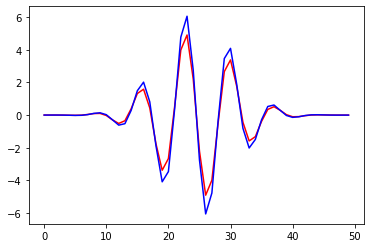

In [20]:
# Initialize variables and function g(x)
deltax = np.pi / 10
x_array = np.linspace(-np.pi, np.pi, 50)
gx = np.exp(- (x_array**2)) * np.sin(2 * np.pi * x_array)


# first-order-derivative twice with deltax = pi/10
output_d1 = first_order_derivative(first_order_derivative(gx, deltax,'central'), deltax, 'central')

# second-order-derivative once with deltax = pi/10
output_d2 = second_order_derivative(gx, deltax)


# Plot
plt.plot(output_d1,'r-')
plt.plot(output_d2,'b-')



---
### 2 Taylor Expansion


Explain the general expression of the Taylor expansion:  

$$ f(t) = f(t_0) + f'(t_0) (t-t_0) + \frac{1}{2!} f''(t_0) (t-t_0)^2 + \cdots + \frac{1}{n!} f^{(n)}(t_0) (t-t_0)^n + \cdots $$

where $f^{(n)}(t)$ is the $n^{\rm th}$ derivative; $f'(t_0)$ and $f''(t_0)$ are the first and second derivatives of the function $f(t)$ evaluated at the point $t=t_0$.

Here we will limit ourselves to expressions that involve up to 2nd derivative. 

#### 2.1 Application: position as a function of time, using velocity and acceleration, for object attached to a spring

The following is a simple application involving an object attached to a spring, and taking advantage of the facts that velocity $v(t)$ and acceleration $a(t)$ are the first and second derivatives, resperctively, of the position $x(t)$:

$$v(t) = \frac{dx}{dt}, \; \; \; a(t) = \frac{dv}{dt} = \frac{d^2 x}{dt^2}$$

We will take the force $F$ acting on an object of mass $m$ along the horitontal $x$-axis to be only due to friction and the spring:

$$ F = - kx(t) - cv(t)$$

where $k$ is the spring constant and $c$ is the coefficient of friction. Since the force is given by Newton's Second Law as: $F=m a(t)$, where $a(t)$ is the instantaneous acceleration, we then have:

$$ a(t) = - \frac{k}{m}x(t) - \frac{c}{m}v(t) $$

We can use the Taylor expansion to get the position $x(t)$ at every moment of time, given the intitial position $x(0)=x_0$ and velocity $v(0)=v_0$:

$$x(t+ dt) = x(t) + v(t) dt + \frac{1}{2} a(t) (dt)^2$$

by constantly updating the position, velocity and acceleration, starting at $t=0$, and using small increments of time $dt$. Using again the Taylor expansion, but keeping only up to first-order terms in $dt$, the velocity is given by:

$$v(t+dt) = v(t) + a(t) dt$$

The above expressions lead to the following algorithm for the time propagation of position, velocity, acceleration:

\begin{equation}
(1) \; \; \; \; a(t) = - \frac{k}{m}x(t) + \frac{c}{m} v(t) \\
(2) \; \; \; \; x(t+dt) = x(t) + v(t) dt + \frac{1}{2} a(t) (dt)^2 \\
(3) \; \; \; \; v(t+dt) = v(t) + a(t) dt \\
(4) \; \; \; \; \mathrm{SET}\; t \to (t+dt) \;\;\; \mathrm{GOTO}\; (1)
\end{equation}

### Problem 1

The trajectory of a particle was observed for 20 seconds and it followed the equation below. Find and plot the velocity and acceleration of the particle as a function of time. 
\begin{equation}
x(t) = 5 + 2t - 0.1t^2 + \sin{\frac{2\pi t}{10}}e^{-\frac{t}{10}}
\end{equation}

*Hint:* You can use the functions you created in the exercises above to calculate the first and second order derivatives.

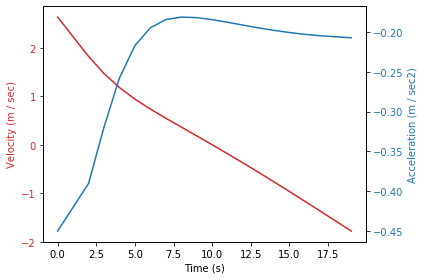

"\nplt.plot(velocity,'r-',label='Velocity')\nplt.plot(accel,'b-', label='Acceleration')\nplt.xlabel('Time (sec)')\nplt.ylabel('Velocity (m/s)')\nplt.grid()\nplt.title('Velocity and Acceleration over time')\nplt.legend();\n"

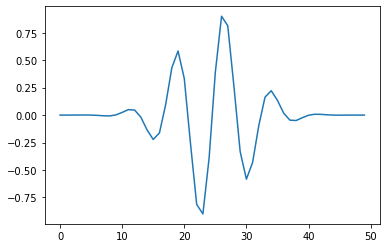

In [40]:
# Initialize variables and function
deltax = 1
t_array = np.arange(0,20, deltax)
position = 5. + (2. * t_array) - (.1 * t_array**2) + np.sin(((2 * np.pi * t_array)/10) * np.exp(-(t_array / 10)))


# Calculate velocity
velocity = first_order_derivative(position, deltax,'central')
# Calculate acceleration
accel = second_order_derivative(position, deltax)


# Plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m / sec)', color=color)
ax1.plot(t_array, velocity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Acceleration (m / sec2)', color=color)  # we already handled the x-label with ax1
ax2.plot(t_array, accel, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.plot(gx)
# Plot

'''
plt.plot(velocity,'r-',label='Velocity')
plt.plot(accel,'b-', label='Acceleration')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.grid()
plt.title('Velocity and Acceleration over time')
plt.legend();
'''

### Problem 2

Often in real world problems, you might obtain data for which you have to calculate derivatives. As an example, load the file `AM10_Lab04_bact_data.txt` which contains the data for the radius of a bacterial colony as a function of time from an experiment. The first column is the colony radius in mm and the second column is the time in hours. Use this data to calculate the colony size (i.e. area) as a function of time and use the area to calculate a growth rate (time derivative of the area) as a function of time. Use the `first_order_derivative` function you wrote from the exercise above with the method as `central`. Plot the colony size and growth rate as a function of time as subplots in a figure. 

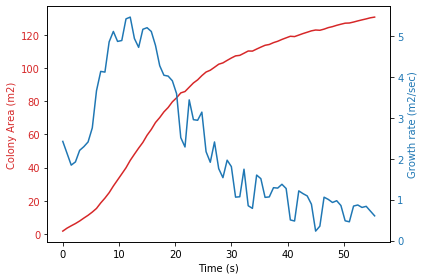

"\n# Plot\nplt.plot(time, area,'r-', label='area')\nplt.plot(time, growth,'bo', label='growth rate')\n"

In [39]:
# Read
radius, time = np.loadtxt('AM10_Lab04_bact_data.txt', unpack = True)

# Calculate colony area
area = np.pi * (radius ** 2)

# Calculate colony growth rate
deltat = 0.75
growth = first_order_derivative(area, deltat,'central')


# Plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Colony Area (m2)', color=color)
ax1.plot(time, area, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Growth rate (m2/sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, growth, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


'''
# Plot
plt.plot(time, area,'r-', label='area')
plt.plot(time, growth,'bo', label='growth rate')
'''

### Problem 3

Consider a mass ($m=1$) attached to a spring with spring constant $k=1$ on a table with friction coefficient $c$. When the spring is equilibrium, i.e. neither extended nor compressed, the mass is at the origin. Calculate the position, velocity, and acceleration of the mass for 100 seconds when it starts of at a position of $x=2$. Below are the equations for the forces on the mass. 

*Hint:* Follow the procedure from section 2. 


\begin{equation}
F(t) = -kx(t) - c v(t)
\end{equation}


Plot the all results (position, velocity, acceleration) for $c = 0.5$, $2$, and $5$. Generate subplots such that the position, velocity, and acceleration plots are arranged in a column with the topmost subplot showing the value of it corressponding $c$ in the title. You will have a $3\times 3$ grid of plots.

In [68]:
# Initialize variables
c = [0.5, 2, 5]
m = 1
k = 1
deltat = 1
t_array = np.arange(0, 100, deltat)
t_array_size = len(t_array)

# Initialize arrays
x = np.zeros((3,100))
for i in range(len(x)):
    x[i,0] = 2. # initial position is +2
v = np.zeros((3,100))
a = np.zeros((3,100))

# Calculate
for i in range(len(c)):
    for n in range(0, t_array_size - 1):
        x[i][n+1] = x[i][n] + (v[i][n] * deltat) + (.5 * a[i][n] * (deltat**2))
        v[i][n+1] = (x[i][n+1] - x[i][n]) / deltat
        a[i][n+1] = - (k/m) * x[i][n+1] - (c[i]/m) * v[i][n+1]


'''
# Debugging
plt.plot(t_array, x[1], 'r',label="Position")
plt.legend()
plt.show()
plt.plot(t_array, v[1], 'g',label="Velocity")
plt.legend()
plt.show()
plt.plot(t_array, a[1], 'b',label="Acceleration")
plt.legend()
plt.show()
'''



'\n# Debugging\nplt.plot(t_array, x[1], \'r\',label="Position")\nplt.legend()\nplt.show()\nplt.plot(t_array, v[1], \'g\',label="Velocity")\nplt.legend()\nplt.show()\nplt.plot(t_array, a[1], \'b\',label="Acceleration")\nplt.legend()\nplt.show()\n'

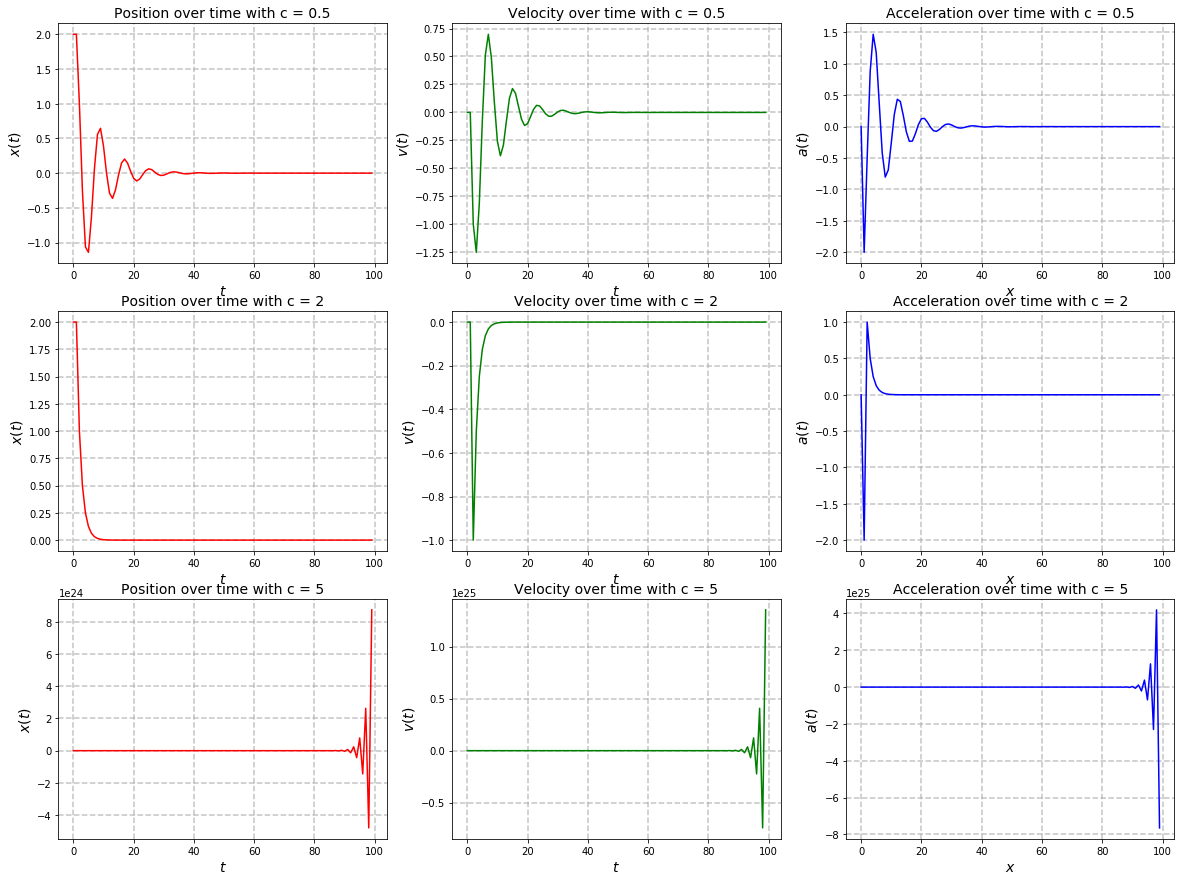

In [71]:
# fig = plt.figure()
fig, ax = plt.subplots(3,3, figsize=(20,15)) 

for row in range(3):
    # FIRST ROW with c = 0.5
    ax[row, 0].plot(t_array, x[row], 'r-')
    ax[row, 1].plot(t_array, v[row], 'g-')
    ax[row, 2].plot(t_array, a[row], 'b-');

    # plt.xlabel('x')
    ax[row, 0].set_xlabel(r'$t$', fontsize=14) # Note the use of TeX for mathematical rendering
    # plt.ylabel('y(x)')
    ax[row, 0].set_ylabel(r'$x(t)$', fontsize=14) 
    # plt.grid(True) 
    ax[row, 0].grid(True, lw=1.5, ls='--', alpha=0.75)

    # plt.xlabel('x')
    ax[row,1].set_xlabel(r'$t$', fontsize=14) # Note the use of TeX for mathematical rendering
    # plt.ylabel('y(x)')
    ax[row,1].set_ylabel(r'$v(t)$', fontsize=14) 
    # plt.grid(True) 
    ax[row,1].grid(True, lw=1.5, ls='--', alpha=0.75)

    # plt.xlabel('x')
    ax[row,2].set_xlabel(r'$x$', fontsize=14) # Note the use of TeX for mathematical rendering
    # plt.ylabel('y(x)')
    ax[row,2].set_ylabel(r'$a(t)$', fontsize=14) 
    # plt.grid(True) 
    ax[row,2].grid(True, lw=1.5, ls='--', alpha=0.75)

    # Titles
    for name in range(len(c)):
        ax[row, 0].set_title(f'Position over time with c = {c[row]}', fontsize=14);
        ax[row, 1].set_title(f'Velocity over time with c = {c[row]}', fontsize=14);
        ax[row, 2].set_title(f"Acceleration over time with c = {c[row]}", fontsize=14)

